# Installing the dependencies and uploading the data

In [1]:
# !pip install matplotlib --upgrade
# !pip install pandas --upgrade
# !pip install keras-tuner


import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
# https://drive.google.com/file/d/1-4QhSH4f2WKH32IntDl8TFaK6CCOh-Xu/view?usp=drive_link
y_train_file_id = '1-4QhSH4f2WKH32IntDl8TFaK6CCOh-Xu'

# https://drive.google.com/file/d/1-0_2-kja-zFjGARCUQe0XQ2PpmUE2-E3/view?usp=drive_link
X_train_file_id = '1-0_2-kja-zFjGARCUQe0XQ2PpmUE2-E3'

# https://drive.google.com/file/d/1XhdkrxWITxUrJKNO4qZBs85yUFVT7uz-/view?usp=sharing
# X_test_file_id = '1XhdkrxWITxUrJKNO4qZBs85yUFVT7uz-'

!gdown --id {y_train_file_id} -O y_train.csv
!gdown --id {X_train_file_id} -O X_train.csv
!gdown --id {X_train_file_id} -O X_test.csv

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-4QhSH4f2WKH32IntDl8TFaK6CCOh-Xu
To: /content/y_train.csv
100% 82.8k/82.8k [00:00<00:00, 68.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-0_2-kja-zFjGARCUQe0XQ2PpmUE2-E3
From (redirected): https://drive.google.com/uc?id=1-0_2-kja-zFjGARCUQe0XQ2PpmUE2-E3&confirm=t&uuid=1cff32a4-4e1a-4a7a-9209-f3949bb386fe
To: /content/X_train.csv
100% 177M/177M [00:01<00:00, 135MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in 

# Zadanie 1

Display the shapes and data types of the training and testing datasets


In [5]:
print('Shapes and dtypes')
print('\nX_train:')
X_train.info()
print('\nX_test:')
X_test.info()
print('\ny_train:')
y_train.info()

Shapes and dtypes

X_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Columns: 9821 entries, AL627309.5 to AC240274.1
dtypes: float64(9821)
memory usage: 284.3 MB

X_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Columns: 9821 entries, AL627309.5 to AC240274.1
dtypes: float64(9821)
memory usage: 284.3 MB

y_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        3794 non-null   int64  
 1   Expected  3794 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 59.4 KB


The datasets are well-structured, complete, and consistent, with appropriate data types for further analysis. No data type conversion or handling of missing values is required at this stage.

In [6]:
X_train.describe()

,AL627309.5,LINC01409,LINC01128,NOC2L,KLHL17,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,...,MT-ATP8,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC011043.1,AL592183.1,AC240274.1
count,3794.000000,3794.000000,3794.000000,3794.000000,3794.0,3794.000000,3794.0,3794.000000,3794.000000,3794.000000,...,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.0,3794.000000,3794.0
mean,0.002606,0.004983,0.016251,0.028493,0.0,0.121418,0.0,0.004855,0.007638,0.041894,...,0.179932,1.656842,0.268125,2.109697,1.097532,0.106618,2.147523,0.0,0.005519,0.0
std,0.046280,0.062321,0.152253,0.155993,0.0,0.328098,0.0,0.069095,0.087671,0.180503,...,0.375393,0.782539,0.458504,0.771975,0.743119,0.302106,0.820102,0.0,0.071392,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,1.298986,0.000000,1.798078,0.654663,0.000000,1.781834,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,1.759255,0.000000,2.198496,1.155886,0.000000,2.245938,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,2.158793,0.579445,2.544927,1.598888,0.000000,2.654846,0.0,0.000000,0.0
max,1.105195,1.635004,3.345526,3.019571,0.0,3.856900,0.0,1.509138,1.502750,1.652683,...,2.968620,4.947779,3.716145,4.794552,4.189403,3.480362,4.961691,0.0,2.033236,0.0


Many variables (genes) have values of 0 across all cells. These variables are uninformative for our predictive modeling. Therefore, I will remove these variables to improve the efficiency and effectiveness of our analysis.

In [3]:
all_zero_columns = X_train.columns[(X_train.min() == 0) & (X_train.max() == 0)]

X_train_nonzero = X_train.drop(columns=all_zero_columns)
X_test_nonzero = X_test.drop(columns=all_zero_columns)

# Verify the shape to ensure columns are removed
print(f"Original number of columns: {X_train.shape[1]}")
print(f"Number of all-zero columns: {all_zero_columns.shape[0]}")
print(f"Number of columns after removing all-zero columns: {X_train_nonzero.shape[1]}")

Original number of columns: 9821
Number of all-zero columns: 821
Number of columns after removing all-zero columns: 9000


I have deleted 821 variables.

Basic statistics of the target variable


In [8]:
y_train_stats = y_train['Expected'].describe()
print("Basic Statistics of 'Expected':")
print(y_train_stats)

Basic Statistics of 'Expected':
count    3794.000000
mean        1.246168
std         0.982112
min         0.000000
25%         0.183596
50%         1.462492
75%         2.166327
max         3.449103
Name: Expected, dtype: float64


Count: 3794
Mean: The average protein abundance is approximately 1.246.
Standard Deviation: The standard deviation is about 0.982, indicating variability in protein abundance levels.
Minimum: The minimum value is 0.000, suggesting some cells have no detected protein abundance.
25th Percentile: 25% of the data lies below approximately 0.184.
Median (50th Percentile): The median value is around 1.462.
75th Percentile: 75% of the data lies below approximately 2.166.

Plot histogram and density plot

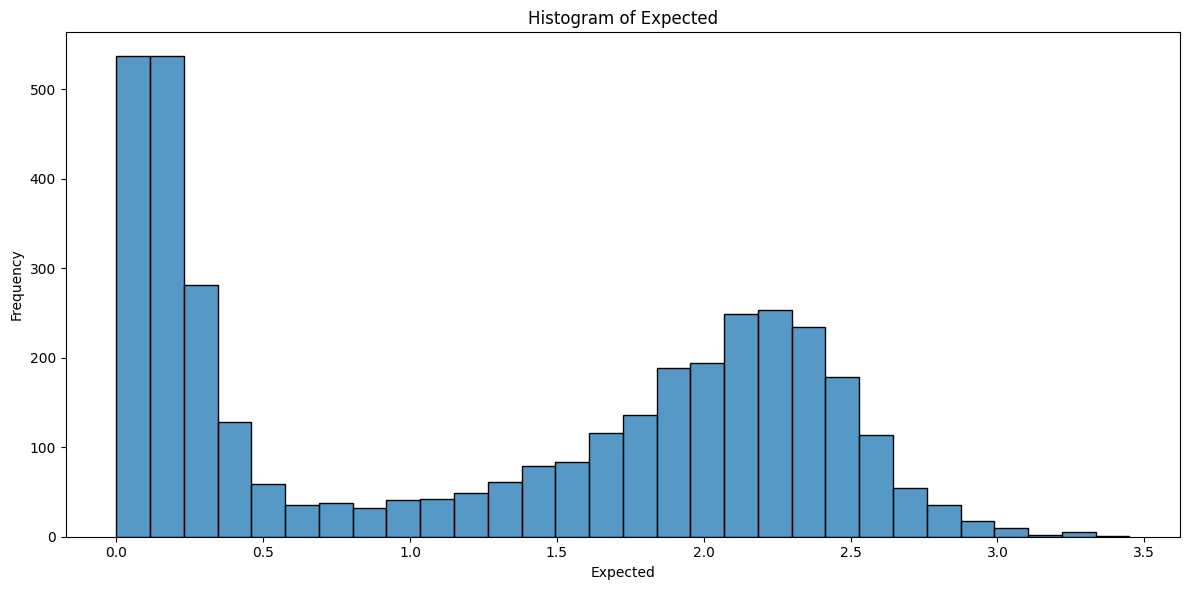

In [9]:
plt.figure(figsize=(12, 6))

sns.histplot(y_train['Expected'], kde=False, bins=30)
plt.title('Histogram of Expected')
plt.xlabel('Expected')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histogram provides a frequency distribution of the protein abundance levels.
It shows the majority of values are concentrated towards the lower end, with some higher values creating a long tail to the right.

Heatmap for 250 features with the highest correlation with the target variable

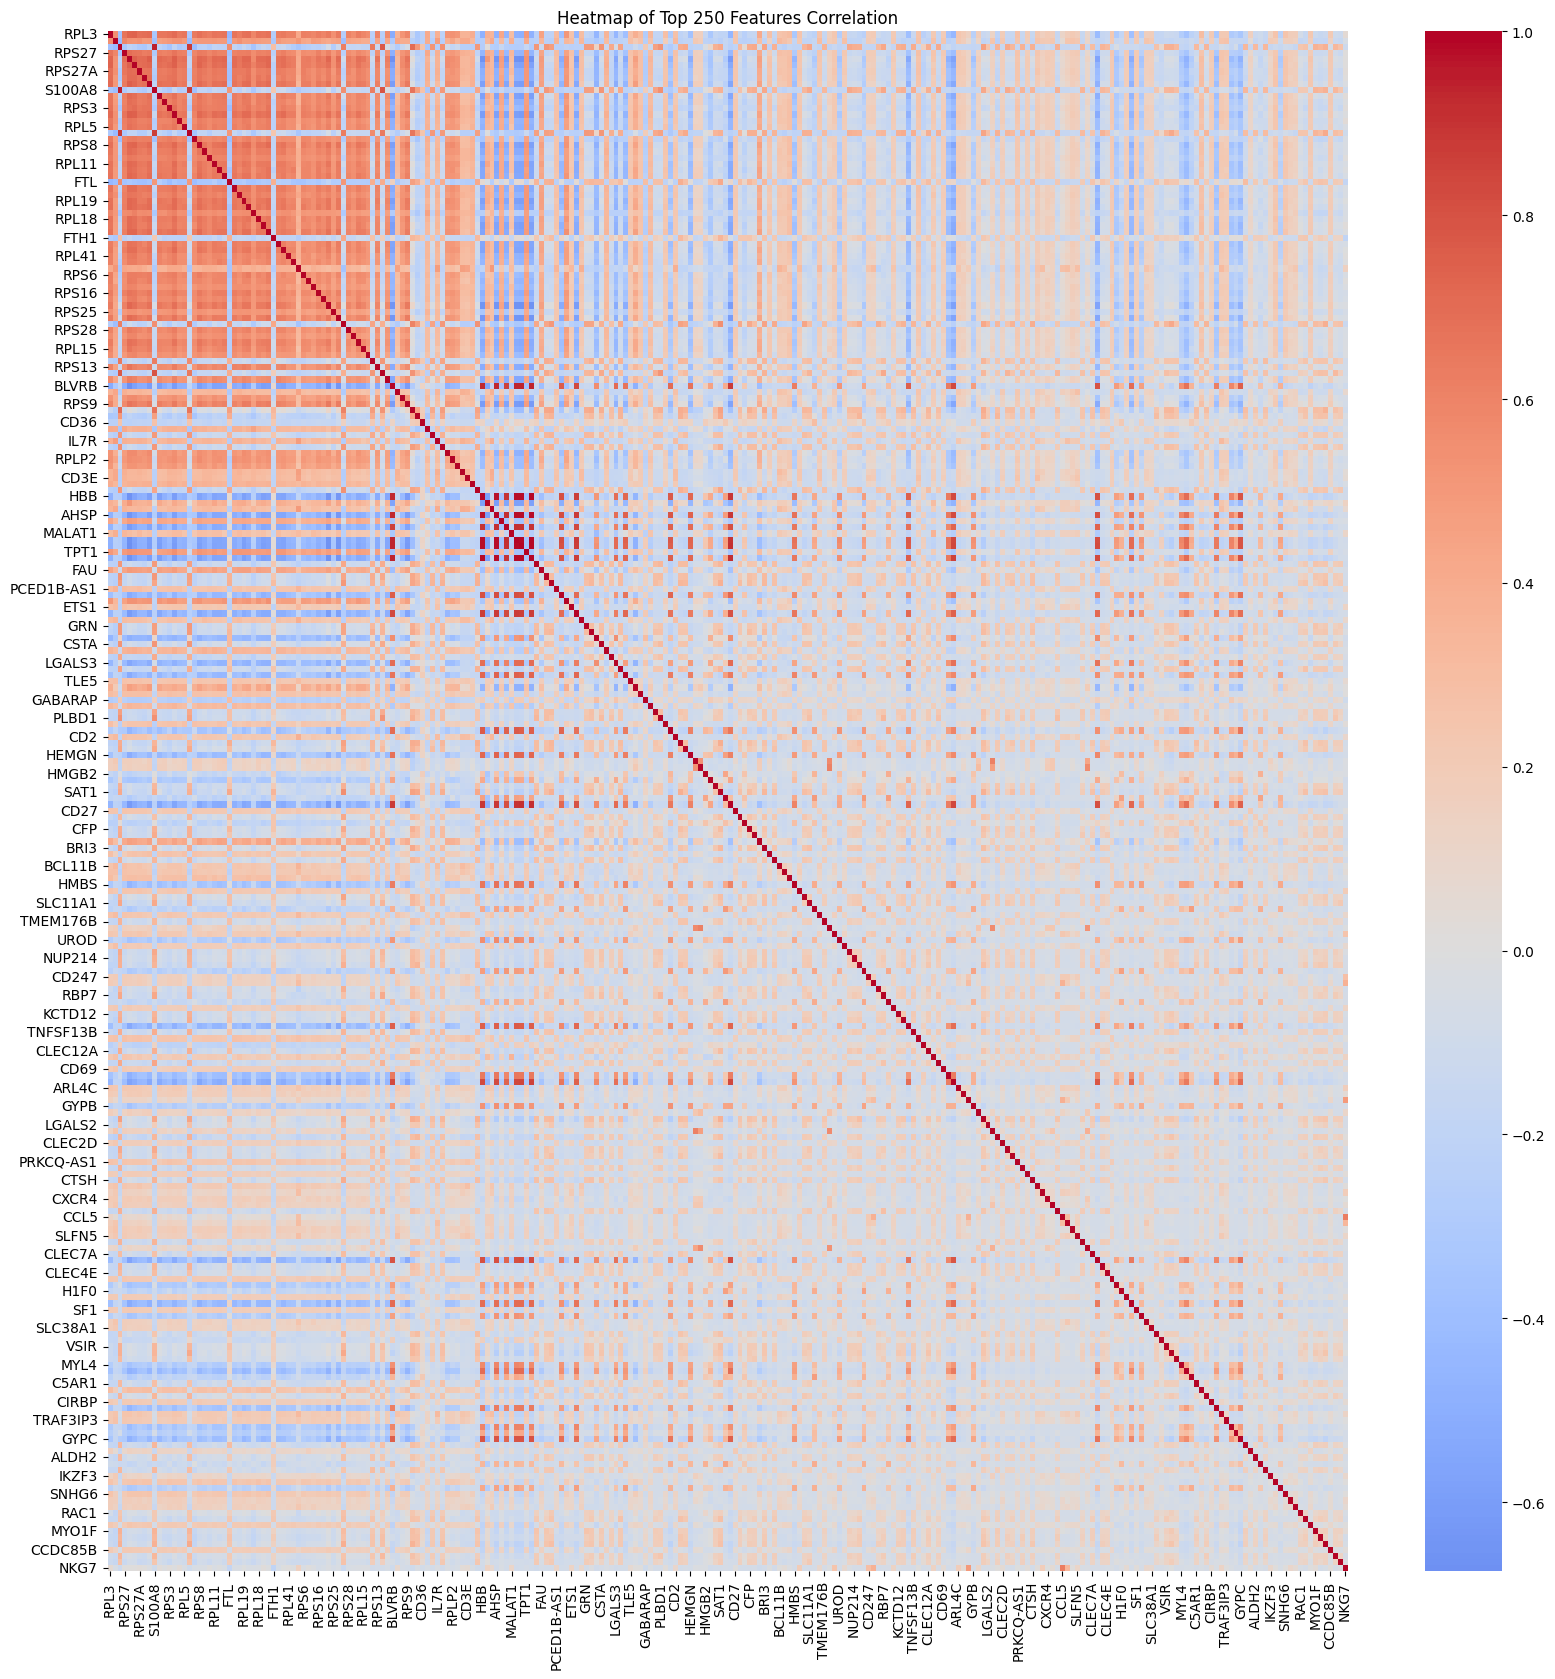

In [10]:
# Calculate correlation with the target variable
correlations = X_train_nonzero.corrwith(y_train['Expected']).abs()

# Select top 250 features with highest correlation
top_250_features = correlations.nlargest(250).index

# Filter the dataset to include only these features
X_train_top_250 = X_train_nonzero[top_250_features]

# Calculate the correlation matrix for the top 250 features
correlation_matrix = X_train_top_250.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Heatmap of Top 250 Features Correlation')
plt.show()


# Zadanie 2

In this section, we focus on training an ElasticNet regression model.
ElasticNet is a linear regression model that includes both L1 and L2 regularization.
- L1 Regularization (Lasso): Encourages sparsity in the model by driving some coefficients to zero, effectively performing feature selection.
- L2 Regularization (Ridge): Shrinks coefficients but does not eliminate them, helping to address multicollinearity.


Parameters Estimated:

- Coefficients (weights): The model estimates the linear relationship between the predictors and the target variable.
- Intercept: The bias term of the linear model.

Optimized Function:

$$
\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \left( \frac{1 - \text{l1_ratio}}{2} \|\beta\|_2^2 + \text{l1_ratio} \|\beta\|_1 \right) \right)
$$


The ElasticNet model optimizes the following loss function:

Hyperparameters:

- alpha: The regularization strength. A higher value increases regularization.
- l1_ratio: The mixing parameter between L1 and L2 regularization. A value of 1 corresponds to Lasso, and a value of 0 corresponds to Ridge.

I am choosing 5-fold cross-validation to balance bias and variance effectively, providing reliable model performance estimates without excessive computational costs.

In [19]:
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the hyperparameter grid
param_grid = {
    'elasticnet__alpha': [0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.5, 1.0]
}

# Create a pipeline with scaling and ElasticNet
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(random_state=42))
])

# Set the number of jobs for parallel processing
n_jobs = -1

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=n_jobs, return_train_score=True, verbose=1)

# Fit the model to the data
grid_search.fit(X_train_nonzero, y_train.Expected)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Extract training and validation errors from cv_results_
cv_results = grid_search.cv_results_

# Mean training and validation errors for each hyperparameter setting
mean_train_errors = -cv_results['mean_train_score']
mean_val_errors = -cv_results['mean_test_score']

# Find the mean training and validation error for the best model
best_index = grid_search.best_index_

mean_train_error_best = mean_train_errors[best_index]
mean_val_error_best = mean_val_errors[best_index]

print(f'Mean training RMSE for best model: {np.sqrt(mean_train_error_best)}')
print(f'Mean validation RMSE for best model: {np.sqrt(mean_val_error_best)}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.5}
Mean training RMSE for best model: 0.40294570407415653
Mean validation RMSE for best model: 0.41192545583543266


ElasticNet does not support an l1_ratio value of 0, which is equivalent to pure Ridge regression. Therefore, I handle Ridge regression separately to ensure we properly evaluate this specific case of L2 regularization.

In [20]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create a pipeline with scaling and ElasticNet
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=n_jobs, return_train_score=True, verbose=1)

grid_search_ridge.fit(X_train_nonzero, y_train.Expected)

ridge_mean_train_error_best = -grid_search_ridge.cv_results_['mean_train_score'][grid_search_ridge.best_index_]
ridge_mean_test_error_best = -grid_search_ridge.cv_results_['mean_test_score'][grid_search_ridge.best_index_]

print('Best hyperparameters:', grid_search_ridge.best_params_)
print(f'Mean training RMSE for best model: {np.sqrt(ridge_mean_train_error_best)}')
print(f'Mean validation RMSE for best model: {np.sqrt(ridge_mean_test_error_best)}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters: {'alpha': 10.0}
Mean training RMSE for best model: 0.03649331448447098
Mean validation RMSE for best model: 0.44070896735465986


GridSearchCV identified the best combination of alpha and l1_ratio that minimizes the mean squared error.
- Best hyperparameters: {'elasticnet__alpha': 10, 'elasticnet__l1_ratio': 0}
- Training RMSE: 0.036, Validation RMSE: 0.441

# Zadanie 3

In this section, we train a Random Forest model and compare its performance with the previously trained ElasticNet model. We will define a grid of hyperparameters for the Random Forest and use cross-validation to select the best model.

Hyperparameters:
- n_estimators: The number of trees in the forest.
- max_depth: The maximum depth of the trees.
- max_features: The number of features to consider when looking for the best split.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)

# Set up the GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True, verbose=1)

# Fit the model to the data
grid_search_rf.fit(X_train_nonzero, y_train.Expected)

# Extract the best model
best_rf_model = grid_search_rf.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters for Random Forest:', grid_search_rf.best_params_)

# Print the best mean squared error
best_rf_mse = -grid_search_rf.best_score_
print('Best MSE for Random Forest:', best_rf_mse)

# Calculate the training error for the best Random Forest model
cv_results_rf = grid_search_rf.cv_results_

# Mean training and validation errors for each hyperparameter setting
mean_train_errors_rf = -cv_results_rf['mean_train_score']
mean_val_errors_rf = -cv_results_rf['mean_test_score']

# Find the mean training and validation error for the best Random Forest model
best_index_rf = grid_search_rf.best_index_
mean_train_error_best_rf = mean_train_errors_rf[best_index_rf]
mean_val_error_best_rf = mean_val_errors_rf[best_index_rf]

print(f'Mean training MSE for best Random Forest model: {mean_train_error_best_rf}')
print(f'Mean validation MSE for best Random Forest model: {mean_val_error_best_rf}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best hyperparameters for Random Forest: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}
Best MSE for Random Forest: 0.11437552841882859
Mean training MSE for best Random Forest model: 0.016662257984021753
Mean validation MSE for best Random Forest model: 0.11437552841882859
Mean training MSE for best ElasticNet model: 0.16236524043181774
Mean validation MSE for best ElasticNet model: 0.169682581165229


In [29]:
# Compare with the ElasticNet model
print('Mean training MSE for best ElasticNet model:', ridge_mean_train_error_best)
print('Mean validation MSE for best ElasticNet model:', ridge_mean_test_error_best)

Mean training MSE for best ElasticNet model: 0.0013317620020624997
Mean validation MSE for best ElasticNet model: 0.19422439390681065


Output for Random Forest:

- Best hyperparameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}
- Best MSE for Random Forest: 0.11437552841882859
- Mean training MSE for best Random Forest model: 0.016662257984021753
- Mean validation MSE for best Random Forest model: 0.11437552841882859

In [30]:
# Converting MSE to RMSE manually to not have to run the above code again
mean_train_error_best_rf = np.sqrt(0.017)
mean_val_error_best_rf = np.sqrt(0.114)
mean_train_error_best_elasticnet = np.sqrt(ridge_mean_train_error_best)
mean_test_error_best_elasticnet = np.sqrt(ridge_mean_test_error_best)

In [33]:
# Calculate mean squared error for the reference model
mean_target = y_train.Expected.mean()
baseline_predictions = [mean_target] * len(y_train)
baseline_mse = mean_squared_error(y_train.Expected, baseline_predictions)


# Create a DataFrame to summarize the results
summary_results = pd.DataFrame({
    'Model': ['ElasticNet', 'Random Forest', 'Baseline'],
    'Mean Training RMSE': [mean_train_error_best_elasticnet, mean_train_error_best_rf, baseline_mse],
    'Mean Validation RMSE': [mean_test_error_best_elasticnet, mean_val_error_best_rf, baseline_mse]
})

print(summary_results)

           Model  Mean Training RMSE  Mean Validation RMSE
0     ElasticNet            0.036493              0.440709
1  Random Forest            0.130384              0.337639
2       Baseline            0.964290              0.964290


***Analysis and Conclusion:***

**ElasticNet:**
- Mean Training RMSE: 0.0365
- Mean Validation RMSE: 0.4407

The ElasticNet model shows a reasonable balance between training and validation RMSE, indicating good generalization.

**Random Forest:**
- Mean Training RMSE: 0.1304
- Mean Validation RMSE: 0.3376

The Random Forest model has a higher training RMSE compared to ElasticNet but a lower validation RMSE, indicating better performance on unseen data.

**Baseline:**
- Mean Training and Validation RMSE: 0.9643

Both ElasticNet and Random Forest significantly outperform the baseline model.

**Conclusion:**

- Best Model: The Random Forest model achieves the lowest validation RMSE, indicating it is the most accurate model for this dataset. Despite having a higher training RMSE than ElasticNet, its validation performance suggests it generalizes well.
- ElasticNet: While it has a lower training RMSE, its higher validation RMSE compared to Random Forest suggests it may be overfitting the training data.
- Baseline Model: The baseline model shows significantly higher RMSE values, confirming that both ElasticNet and Random Forest provide much better predictive performance.

# Zadanie 4

#### 1st model - neural network, only data scaling

Epoch 1/100
95/95 [==============================] - 7s 13ms/step - loss: 1125835.8750 - val_loss: 4081479.7500
Epoch 2/100
95/95 [==============================] - 1s 8ms/step - loss: 870748.9375 - val_loss: 4151680.7500
Epoch 3/100
95/95 [==============================] - 1s 7ms/step - loss: 819652.6250 - val_loss: 4176714.2500
Epoch 4/100
95/95 [==============================] - 1s 10ms/step - loss: 811137.8125 - val_loss: 4103915.5000
Epoch 5/100
95/95 [==============================] - 1s 11ms/step - loss: 814563.0000 - val_loss: 4062855.5000
Epoch 6/100
95/95 [==============================] - 1s 9ms/step - loss: 808336.0625 - val_loss: 4135434.0000
Epoch 7/100
95/95 [==============================] - 1s 11ms/step - loss: 804893.6875 - val_loss: 4156732.0000
Epoch 8/100
95/95 [==============================] - 1s 7ms/step - loss: 802727.4375 - val_loss: 4184550.2500
Epoch 9/100
95/95 [==============================] - 1s 7ms/step - loss: 802076.9375 - val_loss: 4131118.2500
Epoch

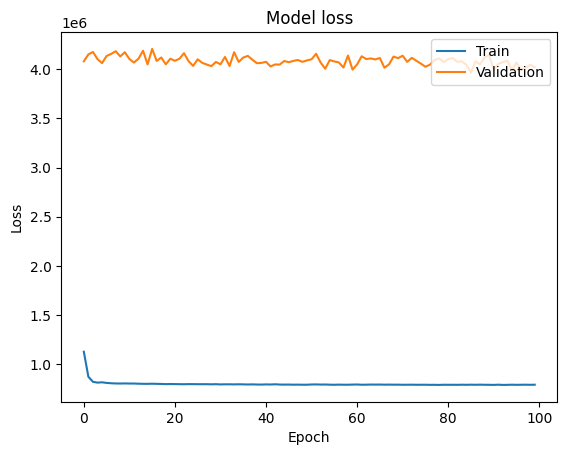

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nonzero)

# Build the model
model = Sequential()
model.add(Dense(512, input_dim=X_train_nonzero.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Preprocessing the data

In [20]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_nonzero, y_train.Expected, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# Dimensionality reduction with PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_preprocessed = pca.fit_transform(X_train_scaled)
X_val_preprocessed = pca.transform(X_val_scaled)

#### 2 model

Epoch 1/100
95/95 [==============================] - 3s 21ms/step - loss: 20.3440 - val_loss: 9.2789
Epoch 2/100
95/95 [==============================] - 2s 16ms/step - loss: 16.0246 - val_loss: 9.1630
Epoch 3/100
95/95 [==============================] - 2s 21ms/step - loss: 14.6024 - val_loss: 9.0751
Epoch 4/100
95/95 [==============================] - 1s 15ms/step - loss: 12.6020 - val_loss: 8.9939
Epoch 5/100
95/95 [==============================] - 2s 17ms/step - loss: 11.7980 - val_loss: 8.9518
Epoch 6/100
95/95 [==============================] - 2s 17ms/step - loss: 11.0828 - val_loss: 8.9158
Epoch 7/100
95/95 [==============================] - 2s 17ms/step - loss: 10.6270 - val_loss: 8.8868
Epoch 8/100
95/95 [==============================] - 1s 12ms/step - loss: 9.9854 - val_loss: 8.8436
Epoch 9/100
95/95 [==============================] - 1s 10ms/step - loss: 9.8557 - val_loss: 8.8298
Epoch 10/100
95/95 [==============================] - 1s 15ms/step - loss: 9.6754 - val_loss:

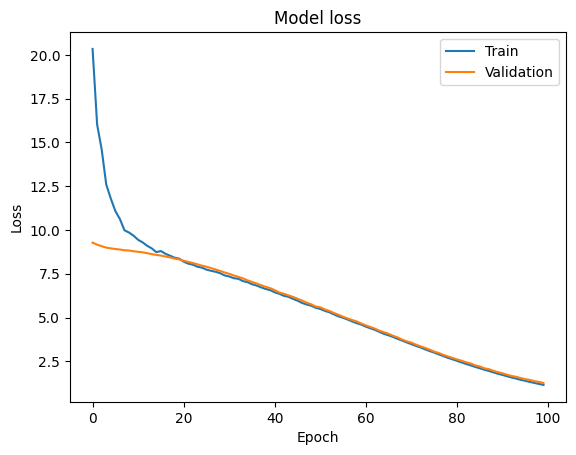

24/24 [==============================] - 0s 3ms/step
Validation MSE: 0.29735455625244167


In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Build the model
model = Sequential()
model.add(Dense(256, input_dim=X_train_preprocessed.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_preprocessed, y_train_split,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val_preprocessed, y_val_split),
                    callbacks=[early_stopping])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model on validation set
val_predictions = model.predict(X_val_preprocessed)
val_mse = mean_squared_error(y_val_split, val_predictions)
print(f'Validation MSE: {val_mse}')

#### 3 model

Epoch 1/300
95/95 [==============================] - 3s 13ms/step - loss: 13.0929 - val_loss: 9.2000 - lr: 1.0000e-04
Epoch 2/300
95/95 [==============================] - 1s 12ms/step - loss: 12.2345 - val_loss: 8.8580 - lr: 1.0000e-04
Epoch 3/300
95/95 [==============================] - 1s 12ms/step - loss: 11.5082 - val_loss: 8.5544 - lr: 1.0000e-04
Epoch 4/300
95/95 [==============================] - 2s 25ms/step - loss: 11.3895 - val_loss: 8.3497 - lr: 1.0000e-04
Epoch 5/300
95/95 [==============================] - 3s 31ms/step - loss: 10.9589 - val_loss: 8.1725 - lr: 1.0000e-04
Epoch 6/300
95/95 [==============================] - 4s 38ms/step - loss: 10.6154 - val_loss: 8.0142 - lr: 1.0000e-04
Epoch 7/300
95/95 [==============================] - 3s 36ms/step - loss: 10.3854 - val_loss: 7.9341 - lr: 1.0000e-04
Epoch 8/300
95/95 [==============================] - 3s 27ms/step - loss: 10.0790 - val_loss: 7.8423 - lr: 1.0000e-04
Epoch 9/300
95/95 [==============================] - 2s 

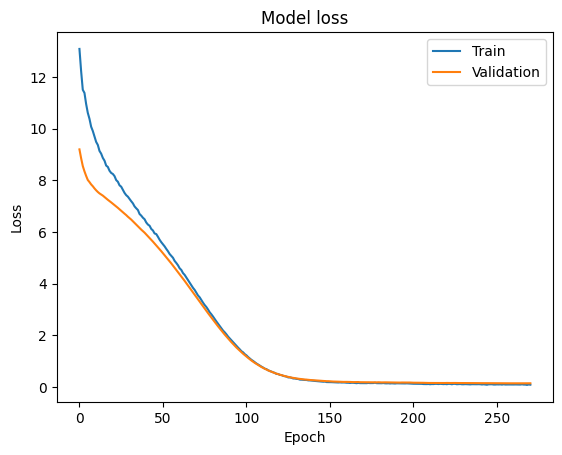

24/24 [==============================] - 0s 3ms/step
Validation MSE: 0.11627454148528536


In [ ]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Build the model
model = Sequential()
model.add(Dense(256, input_dim=X_train_preprocessed.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train_preprocessed, y_train_split,
                    epochs=300,
                    batch_size=32,
                    validation_data=(X_val_preprocessed, y_val_split),
                    callbacks=[early_stopping, reduce_lr])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model on validation set
val_predictions = model.predict(X_val_preprocessed)
val_mse = mean_squared_error(y_val_split, val_predictions)
print(f'Validation MSE: {val_mse}')

#### tuner

In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=512, step=32),
                    activation='relu',
                    input_dim=X_train_preprocessed.shape[1],
                    kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_1', 0.01, 0.1))))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', 0.3, 0.7, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32),
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_2', 0.01, 0.1))))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', 0.3, 0.7, step=0.1)))
    model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=16),
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_3', 0.01, 0.1))))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_3', 0.3, 0.7, step=0.1)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')),
                  loss='mean_squared_error')
    return model

tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=20,
                        executions_per_trial=3,
                        directory='my_dir',
                        project_name='protein_prediction')

tuner.search(X_train_split, y_train_split, epochs=100, validation_data=(X_val_preprocessed, y_val_split), callbacks=[early_stopping])
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


Trial 20 Complete [00h 07m 21s]
val_loss: 0.2761166989803314

Best val_loss So Far: 0.2314709722995758
Total elapsed time: 02h 37m 04s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               743424    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 192)               49344     
                                                                 
 batch_normalization_1 (Bat  (None, 192)               768       
 chNormalization)                                    

#### model XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
evallist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 1000
early_stopping_rounds = 10
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=early_stopping_rounds)

# Predict on the validation set
xgb_val_predictions = bst.predict(dval)
xgb_val_mse = mean_squared_error(y_val_split, xgb_val_predictions)
print(f'XGBoost Validation MSE: {xgb_val_mse}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-rmse:0.90056	eval-rmse:0.89008
[1]	train-rmse:0.82492	eval-rmse:0.82111
[2]	train-rmse:0.75421	eval-rmse:0.75539
[3]	train-rmse:0.69187	eval-rmse:0.69805
[4]	train-rmse:0.63752	eval-rmse:0.64924
[5]	train-rmse:0.58750	eval-rmse:0.60472
[6]	train-rmse:0.54241	eval-rmse:0.56450
[7]	train-rmse:0.50169	eval-rmse:0.53021
[8]	train-rmse:0.46643	eval-rmse:0.50098
[9]	train-rmse:0.43396	eval-rmse:0.47532
[10]	train-rmse:0.40610	eval-rmse:0.45352
[11]	train-rmse:0.38151	eval-rmse:0.43448
[12]	train-rmse:0.35874	eval-rmse:0.41722
[13]	train-rmse:0.33890	eval-rmse:0.40409
[14]	train-rmse:0.32089	eval-rmse:0.39155
[15]	train-rmse:0.30523	eval-rmse:0.38329
[16]	train-rmse:0.29230	eval-rmse:0.37556
[17]	train-rmse:0.28040	eval-rmse:0.36746
[18]	train-rmse:0.27055	eval-rmse:0.36159
[19]	train-rmse:0.26088	eval-rmse:0.35689
[20]	train-rmse:0.25179	eval-rmse:0.35275
[21]	train-rmse:0.24376	eval-rmse:0.34864
[22]	train-rmse:0.23659	eval-rmse:0.34670
[23]	train-rmse:0.22992	eval-rmse:0.34439
[2

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# param_grid = {
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 1.5, 2]
# }

param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

from sklearn.model_selection import ParameterGrid

# Initialize variables to store the best results
best_params = None
best_val_score = float('inf')

# Iterate over all combinations of parameters
for params in ParameterGrid(param_grid):
    # Set the parameters for XGBoost
    xgb_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': params['max_depth'],
        'eta': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'alpha': params['reg_alpha'],
        'lambda': params['reg_lambda'],
        'seed': 42
    }

    # Train the model with early stopping
    evallist = [(dtrain, 'train'), (dval, 'eval')]
    num_round = params['n_estimators']
    model = xgb.train(xgb_params, dtrain, num_round, evallist, early_stopping_rounds=10, verbose_eval=False)

    # Predict on the validation set
    val_predictions = model.predict(dval)
    val_score = mean_squared_error(y_val_split, val_predictions)

    # Update the best parameters if the current score is better
    if val_score < best_val_score:
        best_val_score = val_score
        best_params = params

# Print the best parameters and the best score
print(f"Best parameters: {best_params}")
print(f"Best validation MSE: {best_val_score}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/l

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Best validation MSE: 0.10603949408690419


best xgboost

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 1,
    'seed': 42,
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'reg_alpha': 0.1,
    'reg_lambda': 1
}


# Train the model
evallist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 1000
early_stopping_rounds = 10
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=early_stopping_rounds)

# Predict on the validation set
xgb_val_predictions = bst.predict(dval)
xgb_val_mse = mean_squared_error(y_val_split, xgb_val_predictions)
print(f'XGBoost Validation MSE: {xgb_val_mse}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:33:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.91629	eval-rmse:0.90451
[1]	train-rmse:0.85580	eval-rmse:0.84685
[2]	train-rmse:0.79462	eval-rmse:0.78914
[3]	train-rmse:0.74601	eval-rmse:0.74144
[4]	train-rmse:0.70173	eval-rmse:0.69871
[5]	train-rmse:0.65584	eval-rmse:0.65666
[6]	train-rmse:0.61947	eval-rmse:0.62263
[7]	train-rmse:0.58356	eval-rmse:0.58972
[8]	train-rmse:0.55629	eval-rmse:0.56711
[9]	train-rmse:0.52269	eval-rmse:0.53667
[10]	train-rmse:0.49349	eval-rmse:0.50969
[11]	train-rmse:0.46794	eval-rmse:0.48698
[12]	train-rmse:0.44591	eval-rmse:0.46742
[13]	train-rmse:0.42632	eval-rmse:0.44965
[14]	train-rmse:0.41078	eval-rmse:0.43641
[15]	train-rmse:0.39625	eval-rmse:0.42389
[16]	train-rmse:0.38519	eval-rmse:0.41468
[17]	train-rmse:0.37558	eval-rmse:0.40693
[18]	train-rmse:0.36556	eval-rmse:0.39836
[19]	train-rmse:0.35829	eval-rmse:0.39289
[20]	train-rmse:0.35213	eval-rmse:0.38886
[21]	train-rmse:0.34623	eval-rmse:0.38437
[22]	train-rmse:0.34032	eval-rmse:0.37999
[23]	train-rmse:0.33620	eval-rmse:0.37738
[2

#### model ensemble

In [24]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(max_depth=30, max_features='auto', n_estimators=100, random_state=42)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train.Expected, test_size=0.2, random_state=42)
rf_model.fit(X_train_split, y_train_split)
rf_val_predictions = rf_model.predict(X_val_split)
rf_val_mse = mean_squared_error(y_val_split, rf_val_predictions)
print(f'Random Forest Validation MSE: {rf_val_mse}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Validation MSE: 0.11207908163997024


In [27]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def create_best_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train_preprocessed.shape[1],
                    kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(192, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.02)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(112, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.03)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='mean_squared_error')
    return model


best_model = create_best_model()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

best_model.fit(X_train_preprocessed,
               y_train_split,
               epochs=300,
               validation_data=(X_val_preprocessed, y_val_split),
               callbacks=[early_stopping, reduce_lr])


nn_val_predictions = best_model.predict(X_val_preprocessed)
nn_val_mse = mean_squared_error(y_val_split, nn_val_predictions)
nn_val_mse

Epoch 1/300
95/95 [==============================] - 7s 29ms/step - loss: 19.4442 - val_loss: 14.8396 - lr: 1.0000e-04
Epoch 2/300
95/95 [==============================] - 2s 23ms/step - loss: 18.6689 - val_loss: 14.2088 - lr: 1.0000e-04
Epoch 3/300
95/95 [==============================] - 2s 20ms/step - loss: 18.0314 - val_loss: 13.9058 - lr: 1.0000e-04
Epoch 4/300
95/95 [==============================] - 1s 14ms/step - loss: 17.2333 - val_loss: 13.7184 - lr: 1.0000e-04
Epoch 5/300
95/95 [==============================] - 1s 15ms/step - loss: 16.8994 - val_loss: 13.5811 - lr: 1.0000e-04
Epoch 6/300
95/95 [==============================] - 1s 14ms/step - loss: 16.4125 - val_loss: 13.4486 - lr: 1.0000e-04
Epoch 7/300
95/95 [==============================] - 1s 15ms/step - loss: 16.0603 - val_loss: 13.3417 - lr: 1.0000e-04
Epoch 8/300
95/95 [==============================] - 2s 20ms/step - loss: 15.6810 - val_loss: 13.2393 - lr: 1.0000e-04
Epoch 9/300
95/95 [=============================

0.11540663721144796

In [28]:
# Define weights to try
weights = np.linspace(0, 1, 11)

# Initialize variables to store best results
best_val_mse = float('inf')
best_weights = None

# Evaluate each combination of weights
for weight_rf in weights:
    for weight_nn in weights:
        weight_xgb = 1 - weight_rf - weight_nn
        if weight_xgb >= 0:
            ensemble_val_predictions = (weight_rf * rf_val_predictions) + (weight_nn * nn_val_predictions.flatten()) + (weight_xgb * xgb_val_predictions)
            ensemble_val_mse = mean_squared_error(y_val_split, ensemble_val_predictions)

            print(f'Weights: RF={weight_rf:.1f}, NN={weight_nn:.1f}, XGB={weight_xgb:.1f} - Validation MSE: {ensemble_val_mse:.4f}')

            if ensemble_val_mse < best_val_mse:
                best_val_mse = ensemble_val_mse
                best_weights = (weight_rf, weight_nn, weight_xgb)

print(f'Best Weights: RF={best_weights[0]:.2f}, NN={best_weights[1]:.2f}, XGB={best_weights[2]:.2f} - Best Validation MSE: {best_val_mse:.4f}')

Weights: RF=0.0, NN=0.0, XGB=1.0 - Validation MSE: 0.1107
Weights: RF=0.0, NN=0.1, XGB=0.9 - Validation MSE: 0.1066
Weights: RF=0.0, NN=0.2, XGB=0.8 - Validation MSE: 0.1035
Weights: RF=0.0, NN=0.3, XGB=0.7 - Validation MSE: 0.1015
Weights: RF=0.0, NN=0.4, XGB=0.6 - Validation MSE: 0.1004
Weights: RF=0.0, NN=0.5, XGB=0.5 - Validation MSE: 0.1004
Weights: RF=0.0, NN=0.6, XGB=0.4 - Validation MSE: 0.1013
Weights: RF=0.0, NN=0.7, XGB=0.3 - Validation MSE: 0.1033
Weights: RF=0.0, NN=0.8, XGB=0.2 - Validation MSE: 0.1063
Weights: RF=0.0, NN=0.9, XGB=0.1 - Validation MSE: 0.1104
Weights: RF=0.0, NN=1.0, XGB=0.0 - Validation MSE: 0.1154
Weights: RF=0.1, NN=0.0, XGB=0.9 - Validation MSE: 0.1091
Weights: RF=0.1, NN=0.1, XGB=0.8 - Validation MSE: 0.1053
Weights: RF=0.1, NN=0.2, XGB=0.7 - Validation MSE: 0.1025
Weights: RF=0.1, NN=0.3, XGB=0.6 - Validation MSE: 0.1007
Weights: RF=0.1, NN=0.4, XGB=0.5 - Validation MSE: 0.1000
Weights: RF=0.1, NN=0.5, XGB=0.4 - Validation MSE: 0.1003
Weights: RF=0.

#### model small NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build the smaller neural network model
smaller_model = Sequential()
smaller_model.add(Dense(128, input_dim=X_train_preprocessed.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
smaller_model.add(BatchNormalization())
smaller_model.add(Dropout(0.5))
smaller_model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
smaller_model.add(BatchNormalization())
smaller_model.add(Dropout(0.5))
smaller_model.add(Dense(1, activation='linear'))

# Compile the model
smaller_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [ ]:
# Train the model
history = smaller_model.fit(X_train_preprocessed, y_train_split,
                            epochs=200,
                            batch_size=32,
                            validation_data=(X_val_preprocessed, y_val_split),
                            callbacks=[early_stopping, reduce_lr])

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model on the validation set
nn_val_predictions = smaller_model.predict(X_val_preprocessed)
nn_val_mse = mean_squared_error(y_val_split, nn_val_predictions)
print(f'Smaller Neural Network Validation MSE: {nn_val_mse}')

#### Final model training

##### Preprocessing data

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nonzero)
X_val_scaled = scaler.transform(X_test_nonzero)

# Dimensionality reduction with PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_preprocessed = pca.fit_transform(X_train_scaled)
X_val_preprocessed = pca.transform(X_val_scaled)

##### xgboost

In [6]:
import xgboost as xgb


# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_preprocessed, label=y_train.Expected)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 1,
    'seed': 42,
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'reg_alpha': 0.1,
    'reg_lambda': 1
}


# Train the model
bst = xgb.train(params, dtrain)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:11:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


##### forest

In [8]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(max_depth=30, max_features='auto', n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train.Expected)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=30, max_features='auto', random_state=42)

##### neural network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


def create_best_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train_preprocessed.shape[1],
                    kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(192, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.02)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(112, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.03)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='mean_squared_error')
    return model


best_model = create_best_model()

# Define callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)

best_model.fit(X_train_preprocessed,
               y_train.Expected,
               epochs=250,
               callbacks=[early_stopping, reduce_lr])

Epoch 1/250
119/119 [==============================] - 6s 28ms/step - loss: 18.8844 - lr: 1.0000e-04
Epoch 2/250
119/119 [==============================] - 2s 17ms/step - loss: 17.8894 - lr: 1.0000e-04
Epoch 3/250
119/119 [==============================] - 2s 18ms/step - loss: 16.9730 - lr: 1.0000e-04
Epoch 4/250
119/119 [==============================] - 2s 16ms/step - loss: 16.4698 - lr: 1.0000e-04
Epoch 5/250
119/119 [==============================] - 2s 14ms/step - loss: 15.9828 - lr: 1.0000e-04
Epoch 6/250
119/119 [==============================] - 2s 15ms/step - loss: 15.4583 - lr: 1.0000e-04
Epoch 7/250
119/119 [==============================] - 2s 18ms/step - loss: 15.1390 - lr: 1.0000e-04
Epoch 8/250
119/119 [==============================] - 3s 24ms/step - loss: 14.7790 - lr: 1.0000e-04
Epoch 9/250
119/119 [==============================] - 3s 25ms/step - loss: 14.4932 - lr: 1.0000e-04
Epoch 10/250
119/119 [==============================] - 2s 18ms/step - loss: 14.1668 - lr: 

##### final guess

In [13]:
dtest = xgb.DMatrix(X_val_preprocessed)

xgb_test_predictions = bst.predict(dtest)
nn_test_predictions = best_model.predict(X_val_preprocessed)
rf_test_predictions = rf_model.predict(X_val_preprocessed)

ensemble_test_predictions = (0.2 * rf_test_predictions) + (0.4 * nn_test_predictions.flatten()) + (0.4 * xgb_test_predictions)

output = pd.DataFrame({'Id': range(len(ensemble_test_predictions)), 'Expected': ensemble_test_predictions.flatten()})
output.to_csv('450107_predykcja.csv', index=False)


119/119 [==============================] - 1s 7ms/step
